In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()
import seaborn as sn
import scipy.stats as st
import re
from collections import Counter
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
%pylab inline
x, y = np.ogrid[100:500, :600]
mask = ((x - 300)/2) ** 2 + ((y - 300)/3) ** 2 > 100 ** 2
mask = 255 * mask.astype(int)


Populating the interactive namespace from numpy and matplotlib


In [2]:
data=pd.read_csv('data.csv',sep='\t',index_col='UniqueID',decimal=',')
data2=pd.read_csv('data.csv',sep='\t',index_col='UniqueID',decimal=',')
question=pd.read_csv('questions.csv',sep='\t',index_col=None).T
question

,0,1,2,3
Idquest,question,parent,type,Treatment
Unnamed: 1,UNIQUE ID,NaN,NaN,NaN
Unnamed: 2,start,NaN,NaN,NaN
Unnamed: 3,end,NaN,NaN,NaN
Unnamed: 4,today,NaN,NaN,NaN
...,...,...,...,...
village,Village/ Community_cleanAD,NaN,NaN,dummy
Unnamed: 342,Interview Status,NaN,NaN,NaN
minorprofile,Miner's profile,NaN,NaN,dummy
FCS,Food Consumption Score,NaN,NaN,NaN


In [3]:
coding=pd.read_csv('coding.csv',sep='\t',decimal=',')
coding

,list name,name,label,cf,code,color
0,Consentmain,1,Interview accepted,NaN,NaN,NaN
1,Consentmain,2,Interview refused,NaN,NaN,NaN
2,Consentmain,3,Household head absent (schedule another time),NaN,NaN,NaN
3,Consent,1,Yes,NaN,NaN,NaN
4,Consent,2,No,NaN,NaN,NaN
...,...,...,...,...,...,...
290,minorprofile,5,Licence Holder,NaN,NaN,NaN
291,NaN,NaN,NaN,NaN,NaN,NaN
292,yesnodkf10,1,Yes,NaN,NaN,NaN
293,yesnodkf10,2,No,NaN,NaN,NaN


In [4]:
coding.dropna(how='all',subset=['code','color'])

,list name,name,label,cf,code,color
23,marital,1,Married,NaN,1.0,white
24,marital,2,Single,NaN,0.0,yellow
25,marital,3,Divorced,NaN,0.0,orange
26,marital,4,Widowed,NaN,0.5,darkgrey
42,setting,0,Urban,NaN,1.0,grey
...,...,...,...,...,...,...
275,leveloffinancing,3,There hasn't been much change,NaN,0.0,yellow
276,leveloffinancing,4,It has increased a little,NaN,1.0,lightgreen
277,leveloffinancing,5,It has increased a lot,NaN,2.0,green
278,leveloffinancing,99,Don't know,NaN,888.0,grey


In [5]:
coding.to_csv('./DashBoard/codes.csv',sep='\t',index=None)

In [6]:
data=data[[i for i in data.columns if 'Unnamed' not in i]]
data.shape

(157, 217)

In [7]:
data

,latitude,longitude,chiefdom,setting,Head_Household,gender_if_no,gf_site,year_joined,gender resp,ageofrespondent,...,bad_carats,price_vary1,price_vary2,accident,accident_numb,debt_amt,debt_freq,notpaidwage,village,minorprofile
UniqueID,,,,,,,,,,,,,,,,,,,,,
20,8.694678,-11.058897,Kamara,Rural,Yes,0,Yes,2020,Male,51,...,0,A lot,A lot,Yes,3,0,A few times,Yes,Samekwedu,Digger
21,8.694750,-11.058894,Kamara,Rural,Yes,0,Yes,2018,Male,36,...,0,"A little for some types of stones, a lot for o...",A lot,No,0,0,Don't know,No,Samekwedu,Mine site manager
22,8.694657,-11.059025,Kamara,Rural,Yes,0,Yes,2020,Male,61,...,5,Don't know,Don't know,No,2,0,Don't know,Don't know,Samekwedu,Supported digger
23,8.678054,-11.038599,Kamara,Rural,Yes,0,No,0,Male,52,...,0,Don't know,Don't know,No,1,0,Never or almost never,No,Fandehun,Digger
24,8.678087,-11.038598,Kamara,Rural,No,Male,Yes,2018,Female,39,...,0,Don't know,Don't know,No,0,0,Never or almost never,No,Fandehun,Casual labourer (kosovo)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,8.716782,-11.229350,Sandor,Rural,Yes,0,Yes,2020,Male,32,...,5,A lot,A lot,No,0,0,Never or almost never,No,Waidala,Supported digger
178,8.716842,-11.229347,Sandor,Rural,Yes,0,Yes,2019,Male,29,...,0,A lot,A lot,No,0,0,Never or almost never,No,Waidala,Mine site manager
179,8.716908,-11.229451,Sandor,Rural,Yes,0,No,0,Male,58,...,10,A little,A lot,No,0,0,Never or almost never,No,Waidala,Supported digger


In [8]:
question.columns=question.loc['Idquest']
question.drop(['Idquest']+[i for i in question.index if 'Unnamed' in i],axis=0,inplace=True)
question

Idquest,question,parent,type,Treatment
latitude,_GPS_latitude,NaN,continue,NaN
longitude,_GPS_longitude,NaN,continue,NaN
chiefdom,Chiefdom,NaN,NaN,dummy
setting,What is the type of environment?,NaN,NaN,to code
Head_Household,A3) Are you the head of your household?,NaN,NaN,NaN
...,...,...,...,...
notpaidwage,"H9) Are you sometimes not paid a wage, because...",NaN,NaN,NaN
village,Village/ Community_cleanAD,NaN,NaN,dummy
minorprofile,Miner's profile,NaN,NaN,dummy
FCS,Food Consumption Score,NaN,NaN,NaN


In [9]:
dummy=[i for i in question.index if question.loc[i]['Treatment']=='dummy']
cont_feat=[i for i in question.index if question.loc[i]['type']=='continue']
to_code=[i for i in question.index if question.loc[i]['Treatment']=='to code']
categorical=[i for i in question.index if (question.loc[i]['Treatment']==question.loc[i]['Treatment'] and question.loc[i]['Treatment'] in ['cat','catno'])]
text=[i for i in question.index if question.loc[i]['Treatment']=='text']
catno=[i for i in categorical if question.loc[i]['Treatment']=='catno']
to_drop=[i for i in question.index if question.loc[i]['Treatment']=='drop']

In [10]:
catno

['land_use No land', 'land2_use No non agricultural land', 'support None']

In [11]:
to_drop

['probs_2', 'probs_3', 'currencya', 'currencyb', 'incomesource_2']

# catno

In [12]:
for i in catno:
    print(data[i].unique())

['Farming (crops, vegetables)' 'Other (specify)'
 'Farming (crops, vegetables) Other (specify)' '0'
 'Farming (crops, vegetables) Agroforestry (trees)'
 'Other (specify) Farming (crops, vegetables)'
 'Farming (crops, vegetables) Rental (to tenant)'
 'Agroforestry (trees) Farming (crops, vegetables)'
 'No usage at the moment']
['0' 'No usage at the moment' 'Construction' 'Mining'
 'Mining Construction' 'Mining Rental (to tenant)']
['Micro-loans' '0'
 'Cash for work Food for work Medicine or medical supplies'
 'Micro-loans Cash for work Food for work Medicine or medical supplies'
 'Food for work' 'Food for work Medicine or medical supplies'
 'Food, no work required' 'Cash for work'
 'Food, no work required Medicine or medical supplies'
 'Cash transfer, no work required Food, no work required'
 'Food, no work required Cash transfer, no work required'
 'Cash for work Medicine or medical supplies'
 'Food, no work required Medicine or medical supplies Other in-kind transfers (seeds, bednets,

In [13]:
for i in catno:
    if '0' in data[i].unique():
        data[i]=data[i].apply(lambda x: 1 if x=='0' else 0)
        data2[i]=data2[i]
    else:
        data[i]=data[i].apply(lambda x: 0 if x=='Yes' else 1)
        data2[i]=data2[i]

In [14]:
categorical

['Hh boys_u5',
 'Hh girls_u5',
 'Hh boys_u17',
 'Hh girls_u17',
 'Hh men',
 'Hh women',
 'Hh men_old',
 'Hh women_old',
 'Hh total',
 'asset 3 or 4 piece sofa set',
 'asset Sofa',
 'asset Dining or coffee table)',
 'asset Bed',
 'asset Mattress',
 'asset Sewing machine',
 'asset Cooker (gas or electric)',
 'asset Stove (electric)',
 'asset Stove (gas)',
 'asset Stove (kerosene)',
 'asset Microwave',
 'asset Refrigerator',
 'asset Freezer',
 'asset Solar charger',
 'asset Battery',
 'asset Air conditioner',
 'asset Fan',
 'asset Radio',
 'asset Cassette recorder',
 'asset Video/DVD',
 'asset TV',
 'asset Generator',
 'asset Washing machine',
 'asset Camera',
 'asset Iron (electric or charcoal)',
 'asset Computer',
 'asset Motorbike',
 'asset Bicycle',
 'asset Car',
 'asset Mobile phone',
 'asset Smartphone',
 'animal Cattle/Cows',
 'animal Sheep',
 'animal Goats',
 'animal Pigs',
 'animal Chicken',
 'animal Duck',
 'animal Other poultry',
 'animal Fish Ponds',
 'land_use No land',
 'lan

In [15]:
for i in categorical:
    if not set(data[i].unique()).issubset(set([0,1])):
        print(i,data[i].unique())

Hh boys_u5 [0 1 3 2 4 5]
Hh girls_u5 [0 1 2 4 3]
Hh boys_u17 [0 1 2 3 5 4 7]
Hh girls_u17 [1 4 0 2 3 8]
Hh men [1 3 0 6 2 5 4 7]
Hh women [1 2 3 0 4 6 5 7]
Hh men_old [ 0  1  2  3 10]
Hh women_old [0 1 2]
Hh total [ 3  8  5  7  6 15  9 21 12 14  4 11 16 19 18 13 17 10 20 22  2  1  0]
asset 3 or 4 piece sofa set [0 6 2 4 1]
asset Sofa [0 3 2 4 1 8]
asset Dining or coffee table) [0 1 2 6 3 4]
asset Bed [2 1 3 4 5 0 8 6 7]
asset Mattress [2 0 3 1 4 5 8 6 7]
asset Sewing machine [0 1 8]
asset Stove (electric) [0 8]
asset Solar charger [0 2 1 3]
asset Battery [0 1 2 3]
asset Air conditioner [0 2]
asset Fan [0 1 3]
asset Radio [0 1 2 4 3]
asset Video/DVD [0 1 2]
asset Generator [0 1 2 8]
asset Iron (electric or charcoal) [ 0  2  1  3 10]
asset Motorbike [0 4 1 2]
asset Bicycle [0 1 8]
asset Mobile phone [0 2 1 3 5 4 6 7]
asset Smartphone [1 0 2 3 4 6 7 5]
animal Cattle/Cows [0 2 5]
animal Sheep [0 4 1 2 3 8]
animal Goats [ 0  1  4  7  2  3  5  8 10]
animal Chicken [ 0  2 10  6  7  5  3  8  1

# Dummies

In [16]:
n=len(data)

In [17]:
for i in dummy:
    print(i,Counter(data[i]))

chiefdom Counter({'Sandor': 54, 'Kamara': 38, 'Nimiyama': 38, 'Nimikoro': 27})
land_rights Counter({'Private ownership': 73, 'Shared ownership': 37, '0': 23, 'Rental (from owner)': 12, 'Community ownership': 10, 'Other (specify)': 2})
land2_rights Counter({'0': 77, 'Private ownership': 50, 'Shared ownership': 23, 'Community ownership': 4, 'Other (specify)': 1, "Don't know": 1, 'Rental (from owner)': 1})
probs_1 Counter({'Cost of food increasing': 54, 'Scarcity of food in the market': 53, 'Less money to buy food': 33, '0': 17})
watersource Counter({'Tap/piped water': 78, 'Borehole': 51, 'Protected well/spring': 23, 'Other (specify)': 4, 'Water truck/vendor': 1})
incomesource_1 Counter({'Mining': 106, 'Agriculture': 32, 'Services': 7, 'Sales & Trade': 5, 'Debt': 3, 'Animal breeding': 3, 'Hunting & Fishing': 1})
incomecat_1 Counter({'Food': 122, 'Children': 13, 'Mining': 7, 'Family obligations': 7, 'House': 4, 'Health': 2, 'Agriculture & Livestock': 1, 'Debt reimbrusement': 1})
incomecat_

In [18]:
# On remplace toutes les valeurs qui représente moins de 10% par Other
for feat in dummy:
    L=[i for i in data[feat].unique() if len(data[data[feat]==i])/n>0.1]
    data[feat]=data[feat].apply(lambda x:x if x in L else 'Other_drop')

In [19]:
#check
for i in dummy:
    print(i,Counter(data[i]))

chiefdom Counter({'Sandor': 54, 'Kamara': 38, 'Nimiyama': 38, 'Nimikoro': 27})
land_rights Counter({'Private ownership': 73, 'Shared ownership': 37, 'Other_drop': 24, '0': 23})
land2_rights Counter({'0': 77, 'Private ownership': 50, 'Shared ownership': 23, 'Other_drop': 7})
probs_1 Counter({'Cost of food increasing': 54, 'Scarcity of food in the market': 53, 'Less money to buy food': 33, '0': 17})
watersource Counter({'Tap/piped water': 78, 'Borehole': 51, 'Protected well/spring': 23, 'Other_drop': 5})
incomesource_1 Counter({'Mining': 106, 'Agriculture': 32, 'Other_drop': 19})
incomecat_1 Counter({'Food': 122, 'Other_drop': 35})
incomecat_2 Counter({'Children': 82, 'Other_drop': 34, 'Food': 24, 'Mining': 17})
secondjob_name Counter({'Farming': 106, 'Other_drop': 28, '0': 23})
village Counter({'Other_drop': 95, 'Waidala': 26, 'Ndorgbor': 20, 'Yormandu': 16})
minorprofile Counter({'Supported digger': 49, 'Digger': 36, 'Casual labourer (kosovo)': 27, 'License holder': 24, 'Mine site mana

In [20]:
data[[i for i in data.columns if 'educ' in i]]

,education
UniqueID,
20,Secondary incomplete
21,Koranic school
22,Primary but incomplete
23,None
24,None
...,...
177,Primary but incomplete
178,Secondary complete
179,None


# Gender

In [21]:
data["gender HHH"]=data.apply(lambda row:row["gender resp"] if row["Head_Household"]=='Yes' else row["gender_if_no"],axis=1)
data2["gender HHH"]=data2.apply(lambda row:row["gender resp"] if row["Head_Household"]=='Yes' else row["gender_if_no"],axis=1)


In [22]:
#check
data[["gender HHH","gender resp","gender_if_no","Head_Household"]].tail(20)


,gender HHH,gender resp,gender_if_no,Head_Household
UniqueID,,,,
162,Male,Male,0,Yes
163,Male,Male,0,Yes
164,Male,Male,0,Yes
165,Male,Male,0,Yes
166,Male,Male,0,Yes
167,Male,Male,0,Yes
168,Female,Female,0,Yes
169,Male,Male,0,Yes
170,Male,Male,0,Yes


In [23]:
data.drop("gender_if_no",axis=1,inplace=True)
data2.drop("gender_if_no",axis=1,inplace=True)

# YesNo and Male/Female

In [24]:
ynd={'Yes':1, 'No':0, "Don't know":888,'No answer':888}
for i in data.columns:
    if set(data[i].unique()).issubset(set(['Yes','No',np.nan,'0'])): 
        data[i]=data[i].apply(lambda x: 1 if x=='Yes' else 0)
    elif set(data[i].unique()).issubset(set(['Male','Female'])):
        data[i]=data[i].apply(lambda x: 1 if x=='Male' else 0)
    elif set(data[i].unique()).issubset(set(['Yes','No',"Don't know",'No answer',np.nan,'0'])):
        data[i]=data[i].apply(lambda x: ynd[x] if x in ynd else 888)
    #if set(data[i].unique()).issubset(set(['Yes','No',"Don't know",'0'])): 
    #    data[i]=data[i].apply(lambda x: 1 if x=='Yes' else 0)

# Individual questions

In [25]:
data['year_joined']=data['year_joined']-2021


In [26]:
for i in ['exp2_1','exp2_2','exp3_1','exp3_2']:
    data[i]=data[i].apply(lambda x: x if x>1000 else x*11135)
    data2[i]=data2[i].apply(lambda x: x if x>1000 else x*11135)

In [27]:
a=data['inc Mining']+data['inc Agriculture']+data['inc Animal breeding']+data['inc Hunting & Fishing']\
+data['inc Sales & Trade (non-mining)']+data['inc Services']+data['inc Debt']+data['inc Other']
for i in ['inc Mining','inc Agriculture','inc Animal breeding','inc Hunting & Fishing',\
          'inc Sales & Trade (non-mining)','inc Services','inc Debt','inc Other']:
    data[i]=(data[i]/a)*100
    data2[i]=(data2[i]/a)*100

a=data['inc2 Mining']+data['inc2 Agriculture']+data['inc2 Animal breeding']+data['inc2 Hunting & Fishing']\
+data['inc2 Sales & Trade (non-mining)']+data['inc2 Services']+data['inc2 Debt']+data['inc2 Other']
for i in ['inc2 Mining','inc2 Agriculture','inc2 Animal breeding','inc2 Hunting & Fishing',\
          'inc2 Sales & Trade (non-mining)','inc2 Services','inc2 Debt','inc2 Other']:
    data[i]=(data[i]/a)*100
    data2[i]=(data2[i]/a)*100



    
    


In [28]:
a=data['inc3 Food']+data['inc3 Health']+data['inc3 Children']+data['inc3 House']+data['inc3 Family obligations']+\
data['inc3 Mining']+data['inc3 Agriculture and Livestock']+data['inc3 Communication']+data['inc3 Fun']+\
data['inc3 Savings']+data['inc3 Debt']+data['inc3 Other']
for i in ['inc3 Food','inc3 Health','inc3 Children','inc3 House','inc3 Family obligations','inc3 Mining',\
          'inc3 Agriculture and Livestock','inc3 Communication','inc3 Fun','inc3 Savings','inc3 Debt','inc3 Other']:
    data[i]=(data[i]/a)*100
    data2[i]=(data2[i]/a)*100

In [29]:
for i in data :
    if 'dailywage' in i[:9]:
        print(i)

dailywage_now
dailywage_past
dailywage_beforegf


In [30]:
for i in data:
    if 'dailywage' in i[:9]:
        data[i]=data[i].apply(lambda x:x if x>=1000 else 11135*x)
        data2[i]=data2[i].apply(lambda x:x if x>=1000 else 11135*x)

# To Code

In [31]:
data[to_code]

,setting,education,worsen,food_situation,change_inc,better,richer,wealthy,workingtime,sitetime,leveloffinancing,price_vary1,price_vary2,debt_freq
UniqueID,,,,,,,,,,,,,,
20,Rural,Secondary incomplete,"Yes, a little bit",It is as bad as last year,Very unstable,A little better off,Much poorer,A little wealthier,I work the same amount of time,I always worked at the same site,There hasn't been much change,A lot,A lot,A few times
21,Rural,Koranic school,"Yes, very much",It is as bad as last year,Unstable,A little better off,A little poorer,No change,I work the same amount of time,1 to 5 years,Don't know,"A little for some types of stones, a lot for o...",A lot,Don't know
22,Rural,Primary but incomplete,"Yes, very much","It is better than last year, but not yet back ...",Unstable,A little better off,Average,No change,I work the same amount of time,1 to 5 years,It has increased a little,Don't know,Don't know,Don't know
23,Rural,None,"Not really, because we weren't affected","It is better than last year, but not yet back ...",Unstable,A little worst off,A little poorer,0,0,6 to 12 months,Don't know,Don't know,Don't know,Never or almost never
24,Rural,None,"Yes, very much",It is even worse than last year,Very unstable,A little better off,Average,No change,I work much more,1 to 6 months,0,Don't know,Don't know,Never or almost never
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,Rural,Primary but incomplete,"Yes, a little bit",It is as bad as last year,Unstable,No big change,Average,A little less wealthy,I work the same amount of time,6 to 12 months,There hasn't been much change,A lot,A lot,Never or almost never
178,Rural,Secondary complete,"Yes, very much",It is even worse than last year,Somewhat stable,A little worst off,Average,A little less wealthy,I work a little less,1 to 5 years,There hasn't been much change,A lot,A lot,Never or almost never
179,Rural,None,"Yes, a little bit",It is as bad as last year,Unstable,No big change,Average,0,0,6 to 12 months,There hasn't been much change,A little,A lot,Never or almost never


In [32]:
for i in to_code:
    print(i,Counter(data[i]))

setting Counter({'Rural': 157})
education Counter({'None': 74, 'Secondary incomplete': 32, 'Primary but incomplete': 18, 'Secondary complete': 11, 'Primary complete': 11, 'Koranic school': 6, 'Post-secondary professional': 4, 'First degree or more': 1})
worsen Counter({'Yes, very much': 116, 'Yes, a little bit': 24, "Not really, because we weren't affected": 16, 'Not really, because we received support': 1})
food_situation Counter({'It is even worse than last year': 58, 'It is better than last year, but not yet back to normal': 51, 'It is as bad as last year': 46, 'It is now back to normal': 2})
change_inc Counter({'Unstable': 105, 'Very unstable': 41, 'Somewhat stable': 6, 'Stable': 4, 'Very stable': 1})
better Counter({'A little better off': 65, 'No big change': 38, 'A lot better off': 24, 'A little worst off': 19, 'A lot worst off': 9, "Don't know": 2})
richer Counter({'Average': 105, 'A little poorer': 33, 'A little richer': 16, 'Much poorer': 1, 'Much richer': 1, "Don't know": 1})

In [33]:
for i in to_code:  
    temp=coding[coding['list name']==i.split(' ')[0]].copy()
    if len(temp)==0:
        print(i)

In [34]:
for i in to_code:
    temp=coding[coding['list name']==i.split(' ')[0]].copy()
    print(i,temp['label'].unique())
    data[i]=data[i].apply(lambda x:float(888 if x not in temp['label'].unique() else temp[temp['label']==x]['code'].values[0]))

setting ['Urban' 'Rural']
education ['None' 'Primary but incomplete' 'Primary complete' 'Secondary incomplete'
 'Secondary complete' 'Post-secondary professional' 'Vocational'
 'First degree or more' 'Koranic school' "Don't know"]
worsen ['Yes, very much' 'Yes, a little bit'
 'Not really, because we received support'
 "Not really, because we weren't affected" "Don't know"]
food_situation ['It is even worse than last year' 'It is as bad as last year'
 'It is better than last year, but not yet back to normal'
 'It is now back to normal' "Don't know"]
change_inc ['Very unstable' 'Unstable' 'Somewhat stable' 'Stable' 'Very stable'
 "Don't know"]
better ['A lot worst off' 'A little worst off' 'No big change'
 'A little better off' 'A lot better off' "Don't know"]
richer ['Much poorer' 'A little poorer' 'Average' 'A little richer' 'Much richer'
 "Don't know"]
wealthy ['Much less wealthy' 'A little less wealthy' 'No change'
 'A little wealthier' 'A lot wealthier' "Don't know"]
workingtime ['I

In [35]:
data[to_code]

,setting,education,worsen,food_situation,change_inc,better,richer,wealthy,workingtime,sitetime,leveloffinancing,price_vary1,price_vary2,debt_freq
UniqueID,,,,,,,,,,,,,,
20,0.0,1.5,-1.0,0.0,-2.0,1.0,-2.0,1.0,0.0,5.00,0.0,2.0,2.0,0.5
21,0.0,0.5,-2.0,0.0,-1.0,1.0,-1.0,0.0,0.0,2.00,888.0,0.5,2.0,888.0
22,0.0,0.5,-2.0,1.0,-1.0,1.0,0.0,0.0,0.0,2.00,1.0,888.0,888.0,888.0
23,0.0,0.0,1.0,1.0,-1.0,-1.0,-1.0,888.0,888.0,0.75,888.0,888.0,888.0,0.0
24,0.0,0.0,-2.0,-1.0,-2.0,1.0,0.0,0.0,-2.0,0.25,888.0,888.0,888.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.0,0.5,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.75,0.0,2.0,2.0,0.0
178,0.0,2.0,-2.0,-1.0,0.0,-1.0,0.0,-1.0,1.0,2.00,0.0,2.0,2.0,0.0
179,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,888.0,888.0,0.75,0.0,1.0,2.0,0.0


In [36]:
for i in to_code:
    print(i,Counter(data[i]))

setting Counter({0.0: 157})
education Counter({0.0: 74, 1.5: 32, 0.5: 24, 2.0: 11, 1.0: 11, 2.5: 4, 3.0: 1})
worsen Counter({-2.0: 116, -1.0: 24, 1.0: 16, 0.0: 1})
food_situation Counter({-1.0: 58, 1.0: 51, 0.0: 46, 2.0: 2})
change_inc Counter({-1.0: 105, -2.0: 41, 0.0: 6, 1.0: 4, 2.0: 1})
better Counter({1.0: 65, 0.0: 38, 2.0: 24, -1.0: 19, -2.0: 9, 888.0: 2})
richer Counter({0.0: 105, -1.0: 33, 1.0: 16, -2.0: 1, 2.0: 1, 888.0: 1})
wealthy Counter({888.0: 56, 0.0: 36, 1.0: 35, -1.0: 17, 2.0: 9, -2.0: 4})
workingtime Counter({888.0: 55, 0.0: 30, -1.0: 23, 1.0: 22, -2.0: 18, 2.0: 9})
sitetime Counter({0.25: 64, 0.75: 54, 2.0: 24, 5.0: 13, 0.0: 1, 888.0: 1})
leveloffinancing Counter({888.0: 72, 1.0: 29, 0.0: 28, -1.0: 12, -2.0: 12, 2.0: 4})
price_vary1 Counter({2.0: 70, 888.0: 33, 0.5: 28, 1.0: 23, 0.0: 3})
price_vary2 Counter({888.0: 79, 2.0: 70, 1.0: 6, 0.5: 2})
debt_freq Counter({0.0: 87, 0.5: 34, 888.0: 32, 1.0: 2, 1.5: 2})


In [37]:
for i in to_code:
    print(i,Counter(data2[i]),'\n')

setting Counter({'Rural': 157}) 

education Counter({'None': 74, 'Secondary incomplete': 32, 'Primary but incomplete': 18, 'Secondary complete': 11, 'Primary complete': 11, 'Koranic school': 6, 'Post-secondary professional': 4, 'First degree or more': 1}) 

worsen Counter({'Yes, very much': 116, 'Yes, a little bit': 24, "Not really, because we weren't affected": 16, 'Not really, because we received support': 1}) 

food_situation Counter({'It is even worse than last year': 58, 'It is better than last year, but not yet back to normal': 51, 'It is as bad as last year': 46, 'It is now back to normal': 2}) 

change_inc Counter({'Unstable': 105, 'Very unstable': 41, 'Somewhat stable': 6, 'Stable': 4, 'Very stable': 1}) 

better Counter({'A little better off': 65, 'No big change': 38, 'A lot better off': 24, 'A little worst off': 19, 'A lot worst off': 9, "Don't know": 2}) 

richer Counter({'Average': 105, 'A little poorer': 33, 'A little richer': 16, 'Much poorer': 1, 'Much richer': 1, "Don'

In [38]:
data.shape

(157, 217)

In [39]:
to_code

['setting',
 'education',
 'worsen',
 'food_situation',
 'change_inc',
 'better',
 'richer',
 'wealthy',
 'workingtime',
 'sitetime',
 'leveloffinancing',
 'price_vary1',
 'price_vary2',
 'debt_freq']

In [40]:
for i in [i for i in data if data[i].dtype=='object']:
    if i not in dummy and i not in to_drop and i not in text:
        print(i,data[i].unique())

need1 ['Sometimes' 'Quite often/ consistently' 'Rarely/Never'
 'Not too often/ A few times']
need2 ['Not too often/ A few times' 'Sometimes' 'Quite often/ consistently'
 'Rarely/Never' "Don't know"]
need3 ['Not too often/ A few times' 'Quite often/ consistently' 'Sometimes'
 'Rarely/Never']
need4 ['Sometimes' 'Not too often/ A few times' 'Quite often/ consistently'
 'Rarely/Never' "Don't know"]
need5 ['Rarely/Never' 'Not too often/ A few times' 'Sometimes'
 'Quite often/ consistently' "Don't know"]
need6 ['Rarely/Never' 'Not too often/ A few times' 'Quite often/ consistently'
 'Sometimes']
need7 ['Rarely/Never' 'Sometimes' 'Not too often/ A few times'
 'Quite often/ consistently' "Don't know"]
need8 ['Rarely/Never' 'Not too often/ A few times' 'Sometimes'
 'Quite often/ consistently']
need9 ['Rarely/Never' 'Not too often/ A few times' 'Sometimes'
 'Quite often/ consistently' "Don't know"]
need10 ['Not too often/ A few times' 'Sometimes' 'Rarely/Never' "Don't know"
 'Quite often/ consis

# Treat 888


In [41]:
# FCS
data['FCS']=2*data['eat1']+3*data['eat2']+\
data['eat3']+data['eat4']+4*data['eat5']+4*data['eat6']+0.5*data['eat7']+0.5*data['eat8']

#check
data[[i for i in data.columns if 'fcs' in i.lower()]]



,FCS
UniqueID,
20,49.5
21,36.5
22,69.5
23,55.0
24,42.5
...,...
177,53.0
178,57.5
179,84.5


In [42]:
#check
[i for i in data.columns if i[:3]=='eat']

['eat1', 'eat2', 'eat3', 'eat4', 'eat5', 'eat6', 'eat7', 'eat8', 'eat9']

In [43]:
data.drop([i for i in data.columns if i[:3]=='eat'],axis=1,inplace=True)
data2.drop([i for i in data.columns if i[:3]=='eat'],axis=1,inplace=True)
data2['FCS']=data['FCS'].apply(lambda x:'Poor' if x<=21 else ('Borderline' if x<=35 else 'Acceptable'))
data2['FCS']

UniqueID
20     Acceptable
21     Acceptable
22     Acceptable
23     Acceptable
24     Acceptable
          ...    
177    Acceptable
178    Acceptable
179    Acceptable
180    Acceptable
181    Borderline
Name: FCS, Length: 157, dtype: object

In [44]:
for i in [i for i in data if i[:4]=='need']:
    print(i)


need1
need2
need3
need4
need5
need6
need7
need8
need9
need10


In [45]:
csi={'Sometimes':2,'Quite often/ consistently':3,'Rarely/Never':0,'Not too often/ A few times':1,"Don't know":888}

for i in [i for i in data if i[:4]=='need']:
    data[i]=data[i].apply(lambda x: csi[x])


In [46]:
L=[]
for i in data.columns:
    if 888 in data[i].unique():
        moyenne=data[data[i]!=888][i].mean()
        data[i]=data[i].apply(lambda x:x if x!=888 else moyenne)
        print(i,moyenne)
        L.append(i)

need2 1.358974358974359
need4 1.0580645161290323
need5 0.08333333333333333
need7 0.9487179487179487
need9 1.0193548387096774
need10 0.6645161290322581
better 0.49032258064516127
richer -0.10897435897435898
wealthy 0.27722772277227725
workingtime -0.18627450980392157
sitetime 1.0865384615384615
financemining 0.6031746031746031
leveloffinancing 0.011764705882352941
price_vary1 1.4274193548387097
price_vary2 1.8846153846153846
debt_freq 0.176
notpaidwage 0.06338028169014084


In [47]:
for i in L:
    print(i,Counter(data[i]),data[i].mean())

need2 Counter({2.0: 83, 0.0: 47, 1.0: 16, 3.0: 10, 1.358974358974359: 1}) 1.358974358974359
need4 Counter({0.0: 72, 2.0: 65, 1.0: 10, 3.0: 8, 1.0580645161290323: 2}) 1.0580645161290323
need5 Counter({0.0: 149, 2.0: 4, 1.0: 2, 3.0: 1, 0.08333333333333333: 1}) 0.08333333333333334
need7 Counter({0.0: 75, 2.0: 57, 1.0: 19, 3.0: 5, 0.9487179487179487: 1}) 0.9487179487179488
need9 Counter({0.0: 69, 2.0: 56, 1.0: 22, 3.0: 8, 1.0193548387096774: 2}) 1.0193548387096774
need10 Counter({0.0: 100, 2.0: 44, 1.0: 9, 0.6645161290322581: 2, 3.0: 2}) 0.6645161290322581
better Counter({1.0: 65, 0.0: 38, 2.0: 24, -1.0: 19, -2.0: 9, 0.49032258064516127: 2}) 0.4903225806451613
richer Counter({0.0: 105, -1.0: 33, 1.0: 16, -2.0: 1, 2.0: 1, -0.10897435897435898: 1}) -0.10897435897435896
wealthy Counter({0.27722772277227725: 56, 0.0: 36, 1.0: 35, -1.0: 17, 2.0: 9, -2.0: 4}) 0.27722772277227686
workingtime Counter({-0.18627450980392157: 55, 0.0: 30, -1.0: 23, 1.0: 22, -2.0: 18, 2.0: 9}) -0.18627450980392163
sit

In [48]:
data['CSI']=data['need1']+2*data['need2']+data['need3']+2*data['need4']+2*data['need5']+\
            2*data['need6']+4*data['need7']+3*data['need8']+3*data['need9']+3*data['need10']
#check
data[[i for i in data.columns if 'need' in i.lower()]]

,need1,need2,need3,need4,need5,need6,need7,need8,need9,need10
UniqueID,,,,,,,,,,
20,2,1.0,1,2.0,0.0,0,0.0,0,0.0,1.0
21,3,2.0,3,2.0,0.0,1,2.0,0,0.0,2.0
22,2,2.0,1,1.0,0.0,1,0.0,0,1.0,0.0
23,3,2.0,2,1.0,1.0,3,0.0,1,0.0,0.0
24,2,3.0,3,3.0,0.0,3,2.0,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
177,0,0.0,2,0.0,0.0,1,0.0,0,1.0,0.0
178,1,1.0,3,0.0,0.0,1,0.0,0,0.0,0.0
179,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0


In [49]:
#check
[i for i in data.columns if i[:4]=='need']

['need1',
 'need2',
 'need3',
 'need4',
 'need5',
 'need6',
 'need7',
 'need8',
 'need9',
 'need10']

In [50]:
data.drop([i for i in data.columns if i[:4]=='need'],axis=1,inplace=True)
data2.drop([i for i in data2.columns if i[:4]=='need'],axis=1,inplace=True)
data2['CSI']=data['CSI']

In [51]:
data['CSI'].describe()

count    157.000000
mean      21.554235
std       11.697406
min        0.000000
25%       13.000000
50%       22.000000
75%       30.000000
max       55.000000
Name: CSI, dtype: float64

# Categorical data

In [52]:
data.drop(text,axis=1,inplace=True)

In [53]:
k=data.shape[1]
for i in dummy:
    k+=len(data[i].unique())
k-len(dummy)

230

In [54]:
#check
for i in data.columns:
    if i not in dummy:
        if data[i].dtype=='object':
            print(i,data[i].unique())

probs_2 ['Cost of food increasing' 'Less money to buy food' '0'
 'Scarcity of food in the market']
probs_3 ['Scarcity of food in the market' 'Less money to buy food' '0'
 'Cost of food increasing' "Don't know"]
currencya ['Sierra Leonean Leone']
currencyb ['Sierra Leonean Leone' 'USD']
incomesource_2 ['Agriculture' 'Debt' 'Mining' 'Animal breeding' 'Sales & Trade' 'Other'
 'Services' 'None in particular' "Don't know"]


# data analysis

In [55]:
to_drop

['probs_2', 'probs_3', 'currencya', 'currencyb', 'incomesource_2']

In [56]:
data.drop(to_drop,axis=1,inplace=True)
data.shape

(157, 195)

In [57]:
df = pd.get_dummies(data, columns=dummy)
df.shape

(157, 225)

In [58]:
df.drop([i for i in df.columns if i[-4:]=='drop' or i[-2:]=='_0'],axis=1,inplace=True)
df.shape

(157, 213)

In [59]:
#check
for i in df.columns:
    if df[i].dtype=='object':
        print(i)

In [60]:
[i for i in df.columns if df[i].isna().sum()>0]

[]

In [61]:
df.drop([i for i in df if set(df[i].unique())==set([0,1]) and df[i].sum()<10],axis=1,inplace=True)

In [62]:
df.shape

(157, 195)

In [63]:
df.drop([i for i in df.columns if df[i].sum()<10 and set(df[i].unique()).issubset(set([0,1]))],axis=1,inplace=True)

In [64]:
df.drop([i for i in df.columns if len(df[i].unique())==1],axis=1,inplace=True)

In [65]:
df.shape

(157, 176)

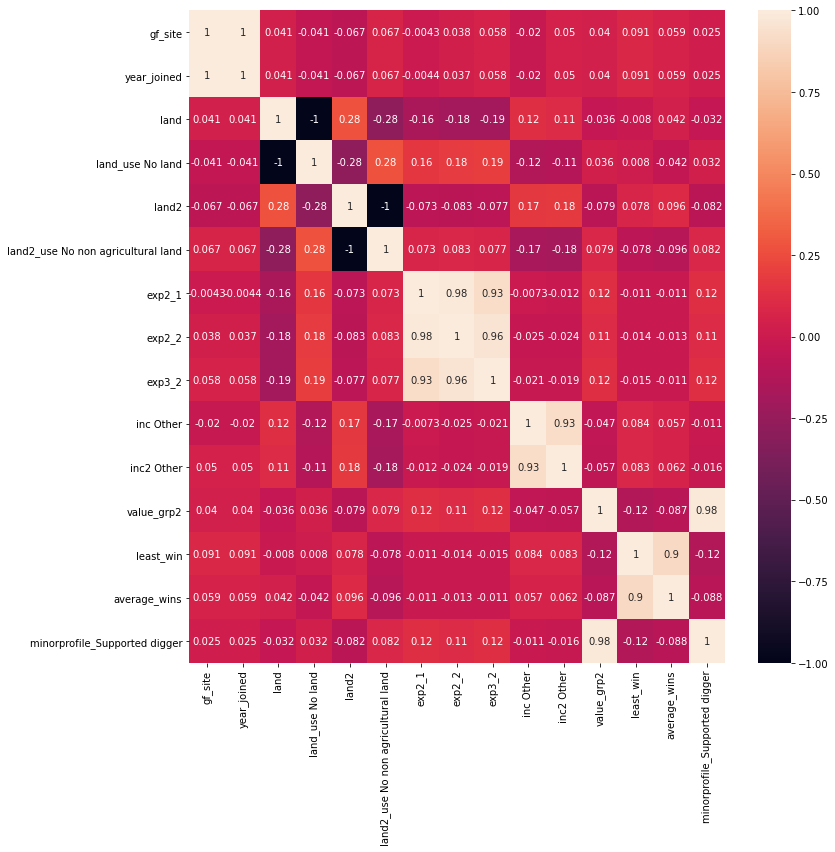

In [66]:
variables=[]
for i in df.columns.tolist():
    a=0
    for j in df.columns.tolist():
        if a==1:
            continue
        elif i!=j:
            if abs(st.pearsonr(df[i],df[j])[0])>0.9:
                variables.append(i)
                a=1

corr2=pd.DataFrame(index=variables)
for i in variables:
    L=[]
    for j in variables:
        L.append(st.pearsonr(df[i],df[j])[0])
    corr2[i]=np.array(L)
plt.figure(figsize=(12,12))
sn.heatmap(corr2, annot=True)
plt.show()

In [67]:
[i for i in df.columns if df[i].isna().sum()>0]

[]

In [68]:
data['CSI'].describe()

count    157.000000
mean      21.554235
std       11.697406
min        0.000000
25%       13.000000
50%       22.000000
75%       30.000000
max       55.000000
Name: CSI, dtype: float64

In [69]:
df.drop(['gf_site', 'land','land2'],axis=1,inplace=True)

In [70]:
########################### On en est là ##############################################

# Extraction des corrélations

In [71]:
binaire=[i for i in df.columns if len(df[i].unique())==2 and set(df[i].unique()).issubset(set([0,1]))]
len(binaire)

59

In [72]:
df.columns

Index(['latitude', 'longitude', 'Head_Household', 'year_joined', 'gender resp',
       'ageofrespondent', 'education', 'Hh boys_u5', 'Hh girls_u5',
       'Hh boys_u17',
       ...
       'incomecat_2_Mining', 'secondjob_name_Farming', 'village_Ndorgbor',
       'village_Waidala', 'village_Yormandu',
       'minorprofile_Casual labourer (kosovo)', 'minorprofile_Digger',
       'minorprofile_License holder', 'minorprofile_Mine site manager',
       'minorprofile_Supported digger'],
      dtype='object', length=173)

In [73]:
parent=question['parent'].dropna()
parent.index

Index(['wealthy', 'workingtime'], dtype='object')

In [74]:
parent

wealthy        gf_site
workingtime    gf_site
Name: parent, dtype: object

In [75]:
parenting=[i for i in df.columns if '_'.join(i.split('_')[:-1]) in parent.index or i in parent.index]
parenting

['wealthy', 'workingtime']

In [76]:
df

,latitude,longitude,Head_Household,year_joined,gender resp,ageofrespondent,education,Hh boys_u5,Hh girls_u5,Hh boys_u17,...,incomecat_2_Mining,secondjob_name_Farming,village_Ndorgbor,village_Waidala,village_Yormandu,minorprofile_Casual labourer (kosovo),minorprofile_Digger,minorprofile_License holder,minorprofile_Mine site manager,minorprofile_Supported digger
UniqueID,,,,,,,,,,,,,,,,,,,,,
20,8.694678,-11.058897,1,-1,1,51,1.5,0,0,0,...,0,1,0,0,0,0,1,0,0,0
21,8.694750,-11.058894,1,-3,1,36,0.5,0,1,1,...,1,0,0,0,0,0,0,0,1,0
22,8.694657,-11.059025,1,-1,1,61,0.5,0,0,0,...,0,1,0,0,0,0,0,0,0,1
23,8.678054,-11.038599,1,-2021,1,52,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24,8.678087,-11.038598,0,-3,0,39,0.0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,8.716782,-11.229350,1,-1,1,32,0.5,0,0,3,...,0,1,0,1,0,0,0,0,0,1
178,8.716842,-11.229347,1,-2,1,29,2.0,2,0,1,...,0,1,0,1,0,0,0,0,1,0
179,8.716908,-11.229451,1,-2021,1,58,0.0,0,0,1,...,0,1,0,1,0,0,0,0,0,1


In [77]:
correl={}
for i in df.columns:
    #On sélectionne le bon modèle
    if i in binaire:
        gbr=GradientBoostingClassifier()
    else:
        gbr=GradientBoostingRegressor()
    
    if i in parenting:
        dfm=df[data2['gf_site']=='Yes'].copy()
        y=dfm[i]
        print(dfm.shape)
        X=dfm.drop([i],axis=1).copy()
   
    else:    
        y=df[i]
        X=df.drop([i],axis=1).copy()
    
    gbr.fit(X,y)
    
    correl[i]=pd.DataFrame(gbr.feature_importances_,index=X.columns).sort_values(by=0,ascending=False).iloc[:10].index.tolist()
    print(i,correl[i])

latitude ['longitude', 'chiefdom_Sandor', 'village_Yormandu', 'watersource_Tap/piped water', 'chiefdom_Nimiyama', 'chiefdom_Kamara', 'village_Waidala', 'CSI', 'watersource_Borehole', 'bad_carats']
longitude ['chiefdom_Kamara', 'latitude', 'chiefdom_Nimikoro', 'village_Yormandu', 'village_Waidala', 'chiefdom_Nimiyama', 'dailywage_past', 'inc2 Agriculture', 'coverdailywage Meals', 'value_grp2']
Head_Household ['gender HHH', 'gender resp', 'Hh total', 'inc3 Family obligations', 'Hh boys_u5', 'asset Mattress', 'wealthy', 'asset Sofa', 'exp3_2', 'year_joined']
year_joined ['dailywage_beforegf', 'workingtime', 'wealthy', 'exp2_2', 'CSI', 'latitude', 'inc Agriculture', 'FCS', 'inc Services', 'longitude']
gender resp ['gender HHH', 'Head_Household', 'Hh men', 'value_grp', 'land2_rights_Shared ownership', 'year_joined', 'asset Solar charger', 'asset Battery', 'asset Video/DVD', 'longitude']
ageofrespondent ['mining_age', 'longitude', 'Hh men', 'sitetime', 'education', 'asset Mattress', 'secondj

land2_use No non agricultural land ['land2_sizeL', 'latitude', 'inc2 Agriculture', 'FCS', 'exp3_2', 'wealthy', 'animal Sheep', 'longitude', 'inc3 Agriculture and Livestock', 'gangpayment']
land2_use Construction ['land2_use Mining', 'land2_rights_Private ownership', 'secondjob_days3', 'exp3_2', 'inc3 Children', 'exp2_1', 'leveloffinancing', 'accident_numb', 'debt_freq', 'compensation Food']
land2_use Mining ['land2_sizeL', 'land2_use Construction', 'land2_use No non agricultural land', 'notpaidwage', 'asset Generator', 'watersource_Borehole', 'animal Cattle/Cows', 'gangpayment', 'resp 2 meals per day', 'inc3 House']
food1 ['worsen', 'CSI', 'FCS', 'secondjob_days3', 'asset Smartphone', 'resp Transport', 'exp2_2', 'bad_carats', 'animal Chicken', 'inc3 Food']
worsen ['dailywage_past', 'asset Bed', 'mining_age', 'food1', 'Hh men', 'Hh total', 'asset Mobile phone', 'secondjob_days4', 'land_sizeL', 'inc3 Children']
food_situation ['secondjob_days4', 'richer', 'price_vary1', 'Hh total', 'cove

richer ['food_situation', 'better', 'FCS', 'change_inc', 'animal Goats', 'Hh boys_u5', 'value_ind', 'inc2 Mining', 'least_win', 'notpaidwage']
(103, 173)
wealthy ['FCS', 'exp2_2', 'coverdailywage Meals', 'CSI', 'better', 'food_situation', 'workingtime', 'Hh men', 'resp Death expenses', 'secondjob_days3']
mining_age ['education', 'ageofrespondent', 'inc Services', 'secondjob_days4', 'exp3_1', 'inc3 Health', 'accident_numb', 'latitude', 'FCS', 'animal Chicken']
mining_months ['sitetime', 'secondjob_days3', 'mining_days2', 'value_grp', 'secondjob_days2', 'CSI', 'inc Agriculture', 'inc2 Agriculture', 'dailywage_beforegf', 'FCS']
mining_days1 ['mining_days2', 'sitetime', 'Hh girls_u17', 'exp2_2', 'inc Debt', 'better', 'secondjob_days4', 'inc Agriculture', 'watersource_Tap/piped water', 'CSI']
mining_days2 ['mining_days1', 'longitude', 'mining_months', 'exp2_2', 'animal Chicken', 'price_vary2', 'inc2 Mining', 'wealthy', 'latitude', 'CSI']
(103, 173)
workingtime ['latitude', 'support Medicine

price_vary2 ['average_wins', 'asset Fan', 'Hh men_old', 'inc2 Agriculture', 'change_inc', 'least_win', 'compensation Daily salary', 'inc3 House', 'asset 3 or 4 piece sofa set', 'mining_days2']
accident ['accident_numb', 'FCS', 'land2_sizeL', 'exp2_1', 'resp Shelter', 'longitude', 'inc3 Agriculture and Livestock', 'value_grp2', 'secondjob_days4', 'good_carats']
accident_numb ['accident', 'mining_age', 'longitude', 'exp2_1', 'inc3 Mining', 'Hh total', 'ageofrespondent', 'education', 'probs_1_Less money to buy food', 'average_carats']
debt_amt ['value_grp', 'inc Debt', 'asset Bed', 'inc3 Food', 'gangpayment', 'debt_freq', 'asset Mattress', 'inc3 Fun', 'ageofrespondent', 'Hh girls_u17']
debt_freq ['debt_amt', 'CSI', 'village_Waidala', 'longitude', 'notpaidwage', 'exp2_1', 'exp2_2', 'value_ind', 'latitude', 'asset Mobile phone']
notpaidwage ['CSI', 'secondjob_days4', 'mining_days1', 'richer', 'debt_freq', 'worsen', 'inc2 Agriculture', 'dailywage_past', 'mining_days2', 'exp2_1']
gender HHH [

In [78]:
categorical

['Hh boys_u5',
 'Hh girls_u5',
 'Hh boys_u17',
 'Hh girls_u17',
 'Hh men',
 'Hh women',
 'Hh men_old',
 'Hh women_old',
 'Hh total',
 'asset 3 or 4 piece sofa set',
 'asset Sofa',
 'asset Dining or coffee table)',
 'asset Bed',
 'asset Mattress',
 'asset Sewing machine',
 'asset Cooker (gas or electric)',
 'asset Stove (electric)',
 'asset Stove (gas)',
 'asset Stove (kerosene)',
 'asset Microwave',
 'asset Refrigerator',
 'asset Freezer',
 'asset Solar charger',
 'asset Battery',
 'asset Air conditioner',
 'asset Fan',
 'asset Radio',
 'asset Cassette recorder',
 'asset Video/DVD',
 'asset TV',
 'asset Generator',
 'asset Washing machine',
 'asset Camera',
 'asset Iron (electric or charcoal)',
 'asset Computer',
 'asset Motorbike',
 'asset Bicycle',
 'asset Car',
 'asset Mobile phone',
 'asset Smartphone',
 'animal Cattle/Cows',
 'animal Sheep',
 'animal Goats',
 'animal Pigs',
 'animal Chicken',
 'animal Duck',
 'animal Other poultry',
 'animal Fish Ponds',
 'land_use No land',
 'lan

In [79]:
cat_cols=list(set([i.split(' ')[0]+' ' for i in categorical]))
cat_cols

['coverdailywage ',
 'animal ',
 'asset ',
 'inc3 ',
 'inc ',
 'resp ',
 'Hh ',
 'land2_use ',
 'land_use ',
 'inc2 ',
 'support ',
 'compensation ']

In [80]:
for i in cat_cols:
    print('####################',i,'####################')
    print([k for k in df.columns if i in k])

#################### coverdailywage  ####################
['coverdailywage Meals', 'coverdailywage Transport', 'coverdailywage Medical care']
#################### animal  ####################
['animal Cattle/Cows', 'animal Sheep', 'animal Goats', 'animal Chicken', 'animal Duck']
#################### asset  ####################
['asset 3 or 4 piece sofa set', 'asset Sofa', 'asset Dining or coffee table)', 'asset Bed', 'asset Mattress', 'asset Sewing machine', 'asset Stove (electric)', 'asset Solar charger', 'asset Battery', 'asset Air conditioner', 'asset Fan', 'asset Radio', 'asset Video/DVD', 'asset Generator', 'asset Iron (electric or charcoal)', 'asset Motorbike', 'asset Bicycle', 'asset Mobile phone', 'asset Smartphone']
#################### inc3  ####################
['inc3 Food', 'inc3 Health', 'inc3 Children', 'inc3 House', 'inc3 Family obligations', 'inc3 Mining', 'inc3 Agriculture and Livestock', 'inc3 Communication', 'inc3 Fun', 'inc3 Savings', 'inc3 Debt', 'inc3 Other']
####

In [81]:
for i in correl:
    for k in range(10):
        for feat in dummy+cat_cols:
            if feat in correl[i][k]:
                correl[i][k]=feat

In [82]:
#fusionnage des variables catégorielles des données des questions principales
#1/ je rassemble les données en une seule catégorie de donnée de cat_cols
for j in dummy+cat_cols:
    correl[j]=[]
    for i in correl:
        if i!=j and j in i:
            correl[j]+=correl[i]

In [83]:
finalkey=dummy+cat_cols
for i in correl:
    a=False
    for k in dummy+cat_cols:
        if k in i:
            a=True
    if not a:
        finalkey.append(i)
            

correl_final={i:correl[i] for i in finalkey}
print(len(correl_final))

82


In [84]:
from collections import Counter
for i in correl_final:
    print(i,[k[0] for k in Counter(correl_final[i]).most_common() if k[0]!=i][:10])

chiefdom ['longitude', 'latitude', 'inc3 ', 'inc2 ', 'Hh ', 'dailywage_beforegf', 'asset ', 'FCS', 'inc ', 'CSI']
land_rights ['land_sizeL', 'land2_rights', 'secondjob_days3', 'inc3 ', 'asset ', 'land_use ', 'latitude', 'inc ', 'FCS', 'secondjob_days4']
land2_rights ['inc2 ', 'land2_sizeL', 'land_rights', 'land_sizeL', 'asset ', 'land2_use ', 'secondjob_days3', 'inc3 ', 'land_use ', 'exp3_2']
probs_1 ['worsen', 'resp ', 'leveloffinancing', 'latitude', 'inc2 ', 'mining_age', 'animal ', 'inc ', 'best_win', 'inc3 ']
watersource ['asset ', 'value_grp2', 'resp ', 'Hh ', 'CSI', 'inc2 ', 'longitude', 'ageofrespondent', 'leveloffinancing', 'inc3 ']
incomesource_1 ['inc ', 'inc2 ', 'inc3 ', 'FCS', 'richer', 'exp2_2', 'exp2_1', 'dailywage_past', 'price_vary1', 'mining_age']
incomecat_1 ['inc3 ', 'incomecat_2', 'longitude', 'secondjob_days3', 'probs_1', 'secondjob_days1', 'asset ', 'animal ', 'exp3_1']
incomecat_2 ['inc3 ', 'asset ', 'longitude', 'latitude', 'inc2 ', 'exp2_1', 'incomecat_1', 'val

In [85]:
for i in correl_final:
    correl_final[i]=[k[0] for k in Counter(correl_final[i]).most_common() if k[0]!=i]

In [86]:
for i in correl_final:
    correl_final[i]=[k[0] for k in Counter(correl_final[i]).most_common() if k[0]!=i][:6]
    if len(correl_final[i])<6:
        print(i,correl_final[i])

In [87]:
correl_final

{'chiefdom': ['longitude',
  'latitude',
  'inc3 ',
  'inc2 ',
  'Hh ',
  'dailywage_beforegf'],
 'land_rights': ['land_sizeL',
  'land2_rights',
  'secondjob_days3',
  'inc3 ',
  'asset ',
  'land_use '],
 'land2_rights': ['inc2 ',
  'land2_sizeL',
  'land_rights',
  'land_sizeL',
  'asset ',
  'land2_use '],
 'probs_1': ['worsen',
  'resp ',
  'leveloffinancing',
  'latitude',
  'inc2 ',
  'mining_age'],
 'watersource': ['asset ', 'value_grp2', 'resp ', 'Hh ', 'CSI', 'inc2 '],
 'incomesource_1': ['inc ', 'inc2 ', 'inc3 ', 'FCS', 'richer', 'exp2_2'],
 'incomecat_1': ['inc3 ',
  'incomecat_2',
  'longitude',
  'secondjob_days3',
  'probs_1',
  'secondjob_days1'],
 'incomecat_2': ['inc3 ',
  'asset ',
  'longitude',
  'latitude',
  'inc2 ',
  'exp2_1'],
 'secondjob_name': ['inc ',
  'secondjob_days3',
  'secondjob_days1',
  'inc2 ',
  'inc3 ',
  'secondjob'],
 'village': ['latitude',
  'asset ',
  'longitude',
  'inc3 ',
  'land2_rights',
  'price_vary1'],
 'minorprofile': ['longitude',

In [88]:
for i in data.columns:
    if i not in data2.columns:
        data2[i]=data[i]

In [137]:
pd.DataFrame(correl_final).to_csv('./DashBoard/correlations.csv',sep='\t',index=None)
data2.to_csv('./DashBoard/viz.csv',sep='\t',index=None)

In [90]:
import pickle

In [89]:
text

[]

In [90]:
text[-4:]

[]

In [91]:
cont_cats=[]
for i in cat_cols:
    for j in cont_feat:
        if i in j:
            if i not in cont_cats:
                cont_cats.append(i)

In [92]:
cont_cats

['animal ', 'asset ', 'inc3 ', 'inc ', 'Hh ', 'inc2 ']

In [93]:
pickle.dump( cont_feat, open( "./DashBoard/cont_feat.p", "wb" ) )
pickle.dump( dummy, open( "./DashBoard/dummy.p", "wb" ) )
pickle.dump( cat_cols, open( "./DashBoard/cat_cols.p", "wb" ) )
pickle.dump( text, open( "./DashBoard/text.p", "wb" ) )
pickle.dump( cont_cats, open( "./DashBoard/cont_cats.p", "wb" ) )

In [93]:
cat_cols

['inc3 ',
 'coverdailywage ',
 'animal ',
 'resp ',
 'support ',
 'compensation ',
 'asset ',
 'Hh ',
 'land2_use ',
 'inc ',
 'land_use ',
 'inc2 ']

In [92]:
cont_feat

['latitude',
 'longitude',
 'ageofrespondent',
 'Hh boys_u5',
 'Hh girls_u5',
 'Hh boys_u17',
 'Hh girls_u17',
 'Hh men',
 'Hh women',
 'Hh men_old',
 'Hh women_old',
 'Hh total',
 'disabled',
 'asset 3 or 4 piece sofa set',
 'asset Sofa',
 'asset Dining or coffee table)',
 'asset Bed',
 'asset Mattress',
 'asset Sewing machine',
 'asset Cooker (gas or electric)',
 'asset Stove (electric)',
 'asset Stove (gas)',
 'asset Stove (kerosene)',
 'asset Microwave',
 'asset Refrigerator',
 'asset Freezer',
 'asset Solar charger',
 'asset Battery',
 'asset Air conditioner',
 'asset Fan',
 'asset Radio',
 'asset Cassette recorder',
 'asset Video/DVD',
 'asset TV',
 'asset Generator',
 'asset Washing machine',
 'asset Camera',
 'asset Iron (electric or charcoal)',
 'asset Computer',
 'asset Motorbike',
 'asset Bicycle',
 'asset Car',
 'asset Mobile phone',
 'asset Smartphone',
 'animal Cattle/Cows',
 'animal Sheep',
 'animal Goats',
 'animal Pigs',
 'animal Chicken',
 'animal Duck',
 'animal Othe

In [94]:
data2['section'].unique()

KeyError: 'section'

In [95]:
cat_cols

['support ',
 'compensation ',
 'inc3 ',
 'asset ',
 'land_use ',
 'Hh ',
 'inc ',
 'inc2 ',
 'land2_use ',
 'animal ',
 'resp ',
 'coverdailywage ']

In [96]:
for i in catno:
    print(data2[i].unique())

['Farming (crops, vegetables)' 'Other (specify)'
 'Farming (crops, vegetables) Other (specify)' '0'
 'Farming (crops, vegetables) Agroforestry (trees)'
 'Other (specify) Farming (crops, vegetables)'
 'Farming (crops, vegetables) Rental (to tenant)'
 'Agroforestry (trees) Farming (crops, vegetables)'
 'No usage at the moment']
['0' 'No usage at the moment' 'Construction' 'Mining'
 'Mining Construction' 'Mining Rental (to tenant)']
['Micro-loans' '0'
 'Cash for work Food for work Medicine or medical supplies'
 'Micro-loans Cash for work Food for work Medicine or medical supplies'
 'Food for work' 'Food for work Medicine or medical supplies'
 'Food, no work required' 'Cash for work'
 'Food, no work required Medicine or medical supplies'
 'Cash transfer, no work required Food, no work required'
 'Food, no work required Cash transfer, no work required'
 'Cash for work Medicine or medical supplies'
 'Food, no work required Medicine or medical supplies Other in-kind transfers (seeds, bednets,

In [ ]:
[i for i in data2.columns if i[0]=='C']

In [ ]:
text

In [ ]:
'CBPN_role_general' in data2.columns

In [95]:
test=data2[[i for i in data2 if i[:4] in ['inc2','inc3']]].copy()

In [96]:
test[[i for i in test if len(test[i].unique())>1]]

,inc2 Mining,inc2 Agriculture,inc2 Animal breeding,inc2 Hunting & Fishing,inc2 Sales & Trade (non-mining),inc2 Services,inc2 Debt,inc2 Other,inc3 Food,inc3 Health,inc3 Children,inc3 House,inc3 Family obligations,inc3 Mining,inc3 Agriculture and Livestock,inc3 Communication,inc3 Fun,inc3 Savings,inc3 Debt,inc3 Other
UniqueID,,,,,,,,,,,,,,,,,,,,
20,50.0,30.0,0.0,0.0,20.0,0.0,0.0,0.0,25.000000,15.000000,20.000000,15.000000,10.000000,0.000000,15.000000,0.0,0.0,0.0,0.0,0.0
21,50.0,25.0,0.0,0.0,15.0,0.0,10.0,0.0,30.000000,15.000000,10.000000,5.000000,0.000000,25.000000,15.000000,0.0,0.0,0.0,0.0,0.0
22,40.0,30.0,0.0,0.0,15.0,0.0,15.0,0.0,13.636364,13.636364,18.181818,9.090909,13.636364,18.181818,13.636364,0.0,0.0,0.0,0.0,0.0
23,90.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,25.000000,20.000000,0.000000,0.000000,0.000000,15.000000,0.000000,20.0,0.0,0.0,20.0,0.0
24,30.0,50.0,0.0,0.0,20.0,0.0,0.0,0.0,25.000000,25.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,20.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,40.0,35.0,25.0,0.0,0.0,0.0,0.0,0.0,40.000000,0.000000,40.000000,0.000000,0.000000,0.000000,20.000000,0.0,0.0,0.0,0.0,0.0
178,75.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,25.000000,20.000000,25.000000,10.000000,0.000000,0.000000,5.000000,0.0,5.0,0.0,10.0,0.0
179,45.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,40.000000,20.000000,25.000000,10.000000,5.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [118]:
mining=test[["inc2 Mining"]+[i for i in test if 'inc3' in i]]
df=pd.DataFrame(columns=["inc2 Mining",'value','inc3'])
for i in [i for i in test if 'inc3' in i]:
    temp=mining[["inc2 Mining",i]]
    temp['inc3']=temp[i].apply(lambda x:i[5:])
    temp.columns=["inc2 Mining",'value','inc3']
    df=df.append(temp)
df.reset_index(inplace=True)
a=df.groupby(['inc2 Mining','value','inc3']).agg({'index':'count'})
a

<ipython-input-118-90c92eb7a825>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['inc3']=temp[i].apply(lambda x:i[5:])


index
inc2 Mining value inc3                            
0.0         0.0   Agriculture and Livestock      8
                  Communication                  7
                  Debt                           5
                  Family obligations             4
                  Fun                            8
...                                            ...
100.0       35.0  Health                         1
            40.0  House                          1
            50.0  Food                           2
            70.0  Food                           1
            90.0  Food                           1

[834 rows x 1 columns]

In [124]:
a.reset_index(inplace=True)

In [125]:
a

,inc2 Mining,value,inc3,index
0,0.0,0.0,Agriculture and Livestock,8
1,0.0,0.0,Communication,7
2,0.0,0.0,Debt,5
3,0.0,0.0,Family obligations,4
4,0.0,0.0,Fun,8
...,...,...,...,...
829,100.0,35.0,Health,1
830,100.0,40.0,House,1
831,100.0,50.0,Food,2
832,100.0,70.0,Food,1


In [127]:
fig = px.scatter(a, x="inc3", y="inc2 Mining", 
                 size='index', hover_data=['index'],color="value")
fig.show()

In [128]:
data2['difference']=data2['dailywage_now']-data2['dailywage_past']

In [133]:
data2['difference'].describe()

count    1.570000e+02
mean    -3.981268e+05
std      3.263446e+06
min     -4.000000e+07
25%     -1.000000e+04
50%     -5.000000e+03
75%      0.000000e+00
max      2.227000e+05
Name: difference, dtype: float64

In [136]:
px.box(data2[(data2['difference']>-50000)&(data2['difference']<50000)], x='gf_site', y='difference',points='all')

In [ ]:
gf_site

# Shap et LGBM

In [ ]:
dfm=df[data['section']==1].copy()
dfm.drop([i]+Protec,axis=1,inplace=True)

In [ ]:
import lightgbm as lgb
import shap

In [ ]:
dfm['temoin']=np.random.standard_normal(len(dfm))

In [ ]:
plt.hist(dfm['temoin'],bins=20)

In [ ]:
lgbm=lgb.LGBMRegressor()
lgbm1=lgb.LGBMRegressor()
lgbm2=lgb.LGBMRegressor()
lgbm3=lgb.LGBMRegressor()

In [ ]:
change

In [ ]:
X=dfm[[i for i in dfm.columns if i not in change]].copy()
y=dfm[change[0]]
y1=dfm[change[1]]
y2=dfm[change[2]]
y3=dfm[change[3]]

In [ ]:
lgbm.fit(X.values,y)
lgbm1.fit(X.values,y1)
lgbm2.fit(X.values,y2)
lgbm3.fit(X.values,y3)

In [ ]:
explainer = shap.TreeExplainer(lgbm,data = X,feature_perturbation='interventional')
explainer1 = shap.TreeExplainer(lgbm1,data = X,feature_perturbation='interventional')
explainer2 = shap.TreeExplainer(lgbm2,data = X,feature_perturbation='interventional')
explainer3 = shap.TreeExplainer(lgbm3,data = X,feature_perturbation='interventional')

In [ ]:
svalues=explainer.shap_values(X,y)
svalues1=explainer1.shap_values(X,y1)
svalues2=explainer2.shap_values(X,y2)
svalues3=explainer3.shap_values(X,y3)

In [ ]:
a=X.columns
a

In [ ]:
questions

In [ ]:
a=X.columns.tolist()
a

In [ ]:
feats=['position longitude', 'C13 No skill training', 'C9 Nocash', 'HH total', 'HH girls', 'HH women', 'income','income_per_member','member_SPC','C1 No training', 'HH children', 'know_leader','marital','cashassistance']

In [ ]:
print(len(feats),len(real_names))

In [ ]:
real_names=['Longitude','Did not receive any skills training','Did not receive Multipurpose Cash Assistance',\
           'Total number of persons in the household', 'Number of girls in the household (5-18)',\
           'Number of women in the household (18+)','Average monthly income','Income per household member',\
           'Member of Seed-Pressing Cooperative','Did not receive any agricultural training',\
           'Number of children in the household (<5)', 'Do you know your camp/block leader',\
           'Marital status','How much did you receive for cashassistance']

In [ ]:
for i in range(14):
    print(feats[i],real_names[i])

In [ ]:
for i in range(len(a)):
    if a[i] in feats:
        a[i]=real_names[feats.index(a[i])]

In [ ]:
[question[3][i] for i in feats if i in question[3]]

In [ ]:
change

In [ ]:

shap.summary_plot(svalues,X, feature_names=a,max_display=5)

In [ ]:

shap.summary_plot(svalues1,X, feature_names=a,max_display=5)

In [ ]:
shap.summary_plot(svalues2,X, feature_names=a,max_display=8)

In [ ]:
shap.summary_plot(svalues3,X, feature_names=a,max_display=6)

In [ ]:
change

In [ ]:
data2['region']

In [ ]:
data['course']

In [ ]:
# Pydeck
df

In [ ]:
import pydeck as pdk
import pandas as pd
import math

SCATTERPLOT_LAYER_DATA = "https://raw.githubusercontent.com/visgl/deck.gl-data/master/website/bart-stations.json"
df = pd.read_json(SCATTERPLOT_LAYER_DATA)

# Use pandas to calculate additional data
df["exits_radius"] = df["exits"].apply(lambda exits_count: math.sqrt(exits_count))

# Define a layer to display on a map
layer = pdk.Layer(
    "ScatterplotLayer",
    df,
    #pickable=True,
    opacity=0.5,
    stroked=True,
    filled=True,
    radius_scale=6,
    radius_min_pixels=1,
    radius_max_pixels=100,
    line_width_min_pixels=1,
    get_position="coordinates",
    get_radius="exits_radius",
    get_fill_color=[255, 140, 0],
    get_line_color=[0, 0, 0],
)

# Set the viewport location
view_state = pdk.ViewState(latitude=37.7749295, longitude=-122.4194155, zoom=10, bearing=0, pitch=0)

# Render
r = pdk.Deck(layers=[layer], initial_view_state=view_state, tooltip={"text": "{name}\n{address}"})
r.to_html("scatterplot_layer.html")

# Autre


In [ ]:
test=pd.read_csv('./DashBoard/codes.csv',index_col=None,sep='\t')

In [ ]:
test[test['list name']=='housing']

In [ ]:
test.dropna(how='any',subset=['color'])

In [ ]:
codes=test.dropna(how='any',subset=['color'])

In [ ]:
codes[codes['list name']=='housing']

In [ ]:
codes.head()

In [ ]:
q1='residency'
q2='housing'

In [ ]:
if q2.split(' ')[0] in codes['list name'].values:
    print('coucou')
    colors=codes[codes['list name']==q2.split(' ')[0]]

In [ ]:
colors

In [ ]:
colors['label'].tolist()

In [ ]:
q2

In [ ]:
agg=data2[[q2,q1]].groupby(by=[q2,q1]).aggregate({q2:'count'}).unstack().fillna(0)
labels=colors['label'].tolist()
colors=colors['color'].tolist()
q2

In [ ]:
agg.loc[labels[0]]

In [ ]:
def count2(abscisse,ordonnée,data):
    
    agg=data2[[abscisse,ordonnée]].groupby(by=[abscisse,ordonnée]).aggregate({abscisse:'count'}).unstack().fillna(0)
    agg2=agg.T/agg.T.sum()
    agg2=agg2.T.round(2)*100
    x=agg.index
    
    if ordonnée.split(' ')[0] in codes['list name'].values:
        colors_code=codes[codes['list name']==ordonnée.split(' ')[0]].sort_values(['coding'])
        labels=colors_code['label'].tolist()
        colors=colors_code['color'].tolist()
        fig = go.Figure()
        print(labels)
        for i in range(len(labels)):
            if labels[i] in data[ordonnée].unique():
                fig.add_trace(go.Bar(x=x, y=agg[(abscisse,labels[i])], name=labels[i],\
                           marker_color=colors[i].lower(),customdata=agg2[(abscisse,labels[i])],textposition="inside",\
                           texttemplate="%{customdata} %",textfont_color="black"))
        
    else:
        fig = go.Figure(go.Bar(x=x, y=agg.iloc[:,0], name=agg.columns.tolist()[0][1],marker_color='green'))
        for i in range(len(agg.columns)-1):
            fig.add_trace(go.Bar(x=x, y=agg.iloc[:,i+1], name=agg.columns.tolist()[i+1][1]))
    
    fig.update_layout(barmode='relative', \
                  xaxis={'title':'<b>'+abscisse+'<b>','title_font':{'size':18}},\
                  yaxis={'title':'Pourcentage','title_font':{'size':18}})
    fig.update_layout(legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1.65,font=dict(size=18),title=dict(font=dict(size=18))
    ))
    fig.update_layout(title_text='test')
    
    return fig.show()


In [ ]:
def pourcent2(abscisse,ordonnée,data):
    
    agg2=data2[[abscisse,ordonnée]].groupby(by=[abscisse,ordonnée]).aggregate({abscisse:'count'}).unstack().fillna(0)
    agg=agg2.T/agg2.T.sum()
    agg=agg.T.round(2)*100
    x=agg2.index
    
    if ordonnée.split(' ')[0] in codes['list name'].values:
        colors_code=codes[codes['list name']==ordonnée.split(' ')[0]].sort_values(['coding'])
        labels=colors_code['label'].tolist()
        colors=colors_code['color'].tolist()
        fig = go.Figure()
        print(labels)
        for i in range(len(labels)):
            if labels[i] in data[ordonnée].unique():
                fig.add_trace(go.Bar(x=x, y=agg[(abscisse,labels[i])], name=labels[i],\
                           marker_color=colors[i].lower(),customdata=agg2[(abscisse,labels[i])],textposition="inside",\
                           texttemplate="%{customdata} people",textfont_color="black"))
        
    else:
        fig = go.Figure(go.Bar(x=x, y=agg.iloc[:,0], name=agg.columns.tolist()[0][1],marker_color='green'))
        for i in range(len(agg.columns)-1):
            fig.add_trace(go.Bar(x=x, y=agg.iloc[:,i+1], name=agg.columns.tolist()[i+1][1]))
    
    fig.update_layout(barmode='relative', \
                  xaxis={'title':'<b>'+abscisse+'<b>','title_font':{'size':18}},\
                  yaxis={'title':'Pourcentage','title_font':{'size':18}})
    fig.update_layout(legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1.65,font=dict(size=18),title=dict(font=dict(size=18))
    ))
    fig.update_layout(title_text='test')
    
    return fig.show()

In [ ]:
data2[ordonnée].unique()

In [ ]:
abscisse='FCS'
ordonnée='assistancetype'
agg=data2[[abscisse,ordonnée]].groupby(by=[abscisse,ordonnée]).aggregate({abscisse:'count'}).unstack().fillna(0)

In [ ]:
agg

In [ ]:
agg.columns[0]

In [ ]:
colors_code

In [ ]:
colors_code=codes[codes['list name']==ordonnée.split(' ')[0]].sort_values(['coding'])
labels=colors_code['label'].tolist()
colors=colors_code['color'].tolist()

In [ ]:
agg[(q1,labels[0])]

In [ ]:
agg=data2[[q1,q2]].groupby(by=[q1,q2]).aggregate({q1:'count'}).unstack().fillna(0)
agg

In [ ]:
agg2=agg.T/agg.T.sum()
agg2=agg2.T*100
agg2

In [ ]:
count2('FCS','assistancetype',data2)

In [ ]:
pourcent2(q1,q2,data2)

In [ ]:
#q1 ordonnée et q2 abcisse

agg=data2[[q2,q1]].groupby(by=[q2,q1]).aggregate({q2:'count'}).unstack().fillna(0)
agg2=agg.T/agg.T.sum()
agg2=agg2.T*100
x=agg.index
fig = go.Figure(go.Bar(x=x, y=agg2[(q2,'Poor')], name='Poor',\
                       marker_color='#F75D59',customdata=agg[(q2,'Poor')],textposition="inside",\
                       texttemplate="%{customdata} persons",textfont_color="black"))
fig.add_trace(go.Bar(x=x, y=agg2[(q2,'Borderline')], name='Borderline',\
                     marker_color='lightgreen',customdata=agg[(q2,'Borderline')],textposition="inside",\
                     texttemplate="%{customdata} persons",textfont_color="black"))
fig.add_trace(go.Bar(x=x, y=agg2[(q2,'Acceptable')], name='Acceptable',\
                     marker_color='#478800',customdata=agg[(q2,'Acceptable')],textposition="inside",\
                     texttemplate="%{customdata} persons",textfont_color="black"))

fig.update_layout(barmode='relative', \
                  xaxis={'title':'<b>'+questions[q2][4:]+'<b>','title_font':{'size':18}},\
                  yaxis={'title':'Pourcentage','title_font':{'size':18}})
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=0.5,font=dict(size=18),title=dict(font=dict(size=18))
))
fig.update_layout(title_text=questions[q1])
fig.show()

In [ ]:
a=4
b=3 if a==2 else 1
b

In [ ]:
DATA_URL = "https://raw.githubusercontent.com/visgl/deck.gl-data/master/examples/geojson/vancouver-blocks.json"
json = pd.read_json(DATA_URL)
df = pd.DataFrame()

In [ ]:
df["coordinates"] = json["features"].apply(lambda row: row["geometry"]["coordinates"])

In [ ]:
df["coordinates"][0]

In [ ]:
names=['2','1','3','4']
print(names[-2][-1])

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.treemap(df, path=[px.Constant("all"), 'sex', 'day', 'time'], 
                 values='total_bill', color='time',
                  color_discrete_map={'(?)':'lightgrey', 'Lunch':'gold', 'Dinner':'darkblue'})
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
%pylab inline
df.total_bill=np.ones(len(df))
df

In [ ]:
fig = px.treemap(df, path=[px.Constant("all"), 'sex', 'day', 'time'], 
                 values='total_bill', color='time',
                  color_discrete_map={'(?)':'lightgrey', 'Lunch':'gold', 'Dinner':'darkblue'})
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()